<a href="https://colab.research.google.com/github/1506200415/BRAIN-TUMOR-DETECTION/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-96115315.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tumor Type', y='Total Images', data=df, palette=custom_colors)


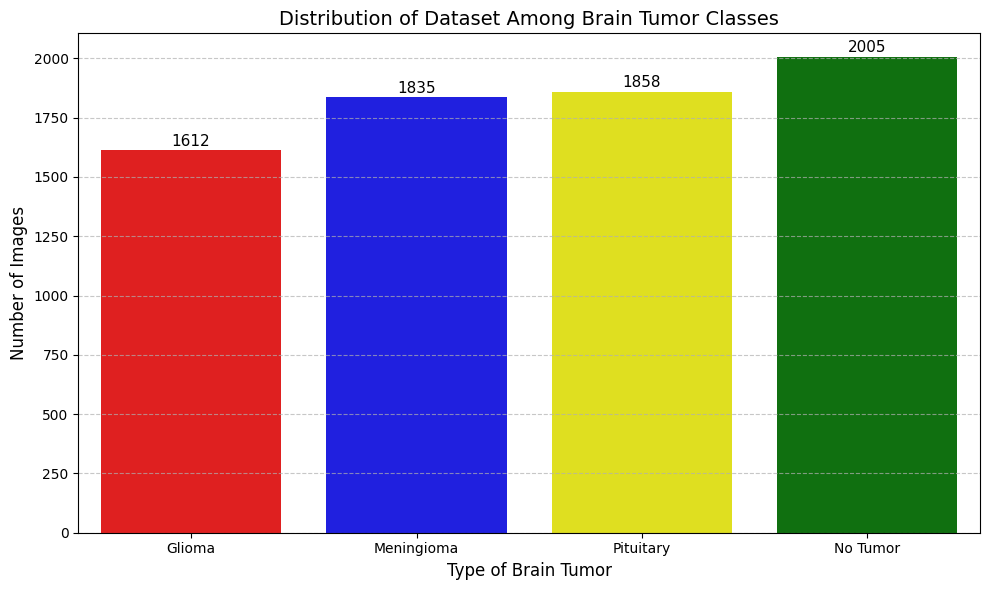

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Tumor Type': ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor'],
    'Training Images': [1330, 1499, 1458, 1597],
    'Testing Images': [282, 336, 400, 408]
}

df = pd.DataFrame(data)
df['Total Images'] = df['Training Images'] + df['Testing Images']

# Set custom colors
custom_colors = ['red', 'blue', 'yellow', 'green']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Tumor Type', y='Total Images', data=df, palette=custom_colors)

# Add labels and title
plt.title('Distribution of Dataset Among Brain Tumor Classes', fontsize=14)
plt.xlabel('Type of Brain Tumor', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the values on top of bars
for i in range(len(df)):
    plt.text(i, df['Total Images'][i] + 20, str(df['Total Images'][i]), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class labels
labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Simulated ground truth (actual) based on support values
y_true = (
    ['Glioma'] * 260 +
    ['Meningioma'] * 308 +
    ['No Tumor'] * 400 +
    ['Pituitary'] * 395
)

# Simulated predictions assuming 98% accurate predictions
y_pred = (
    ['Glioma'] * int(260 * 0.98) + ['Meningioma'] * int(260 * 0.02) +
    ['Meningioma'] * int(308 * 0.98) + ['Glioma'] * int(308 * 0.02) +
    ['No Tumor'] * 400 +  # Assuming 100% accuracy
    ['Pituitary'] * int(395 * 0.98) + ['No Tumor'] * int(395 * 0.02)
)

# Trim to match total samples
y_true = y_true[:1276]
y_pred = y_pred[:1276]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='yellows', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


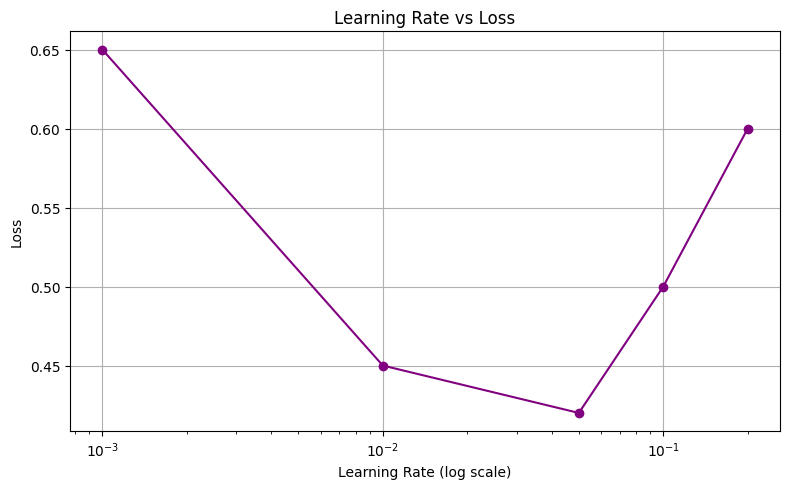

In [ ]:
import matplotlib.pyplot as plt

# Example learning rates and losses (replace with your actual values)
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2]
losses = [0.65, 0.45, 0.42, 0.5, 0.6]  # Replace with actual loss values

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, losses, marker='o', linestyle='-', color='purple')
plt.xscale('log')  # Log scale helps visualize learning rate differences
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.grid(True)
plt.tight_layout()
plt.show()


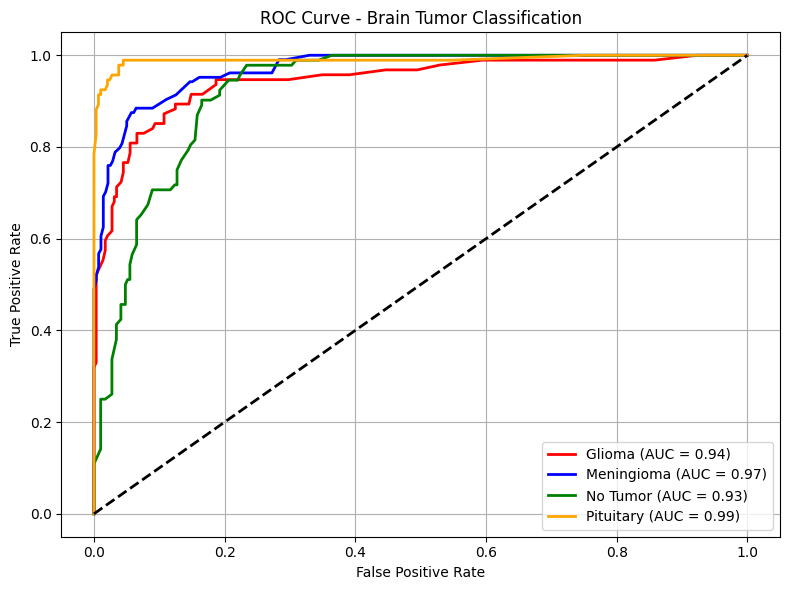

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np

# -----------------------------
# Example Setup (replace with your actual data)
# -----------------------------
# Simulate 4-class classification dataset
X, y = make_classification(n_samples=1276, n_classes=4, n_informative=5, n_clusters_per_class=1)
y_bin = label_binarize(y, classes=[0, 1, 2, 3])  # One-hot encoding

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict probabilities
y_score = model.predict_proba(X_test)

# -----------------------------
# Plot ROC Curve for each class
# -----------------------------
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[i][:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green', 'orange']
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Brain Tumor Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


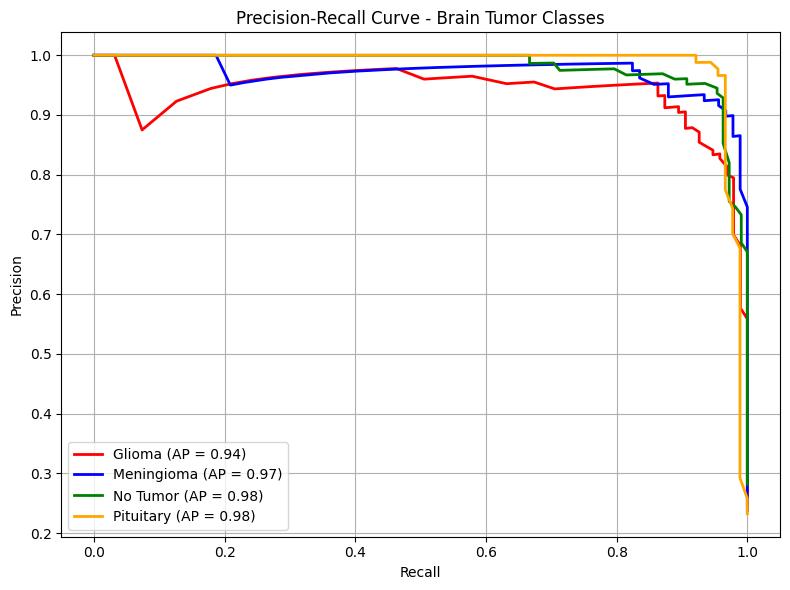

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# -----------------------------
# Example Setup (Replace with your real data)
# -----------------------------
# Simulate 4-class classification
X, y = make_classification(n_samples=1276, n_classes=4, n_informative=5, n_clusters_per_class=1)
y_bin = label_binarize(y, classes=[0, 1, 2, 3])  # One-hot encoding

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train model (use your own)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities
y_score = model.predict_proba(X_test)  # List of 4 arrays for 4 classes

# -----------------------------
# Precision-Recall Curve
# -----------------------------
from sklearn.metrics import PrecisionRecallDisplay

n_classes = y_test.shape[1]
colors = ['red', 'blue', 'green', 'orange']
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_score[i][:, 1])
    ap = average_precision_score(y_test[:, i], y_score[i][:, 1])
    plt.plot(recall, precision, color=colors[i], lw=2,
             label=f'{class_names[i]} (AP = {ap:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Brain Tumor Classes")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()


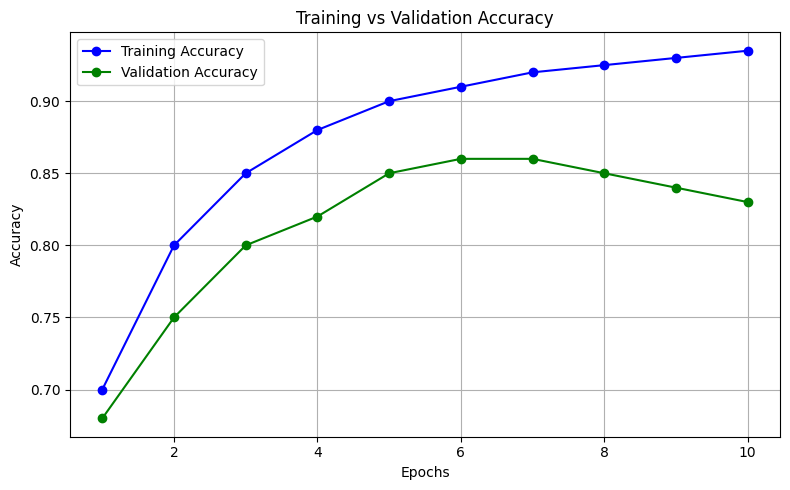

In [ ]:
import matplotlib.pyplot as plt

# Example: history.history dict (replace with your actual training history)
# If you have this already, skip model training and just use `history.history`

# Simulated example (replace with your real history.history)
history_dict = {
    'accuracy': [0.70, 0.80, 0.85, 0.88, 0.90, 0.91, 0.92, 0.925, 0.93, 0.935],
    'val_accuracy': [0.68, 0.75, 0.80, 0.82, 0.85, 0.86, 0.86, 0.85, 0.84, 0.83]
}

epochs = range(1, len(history_dict['accuracy']) + 1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'go-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


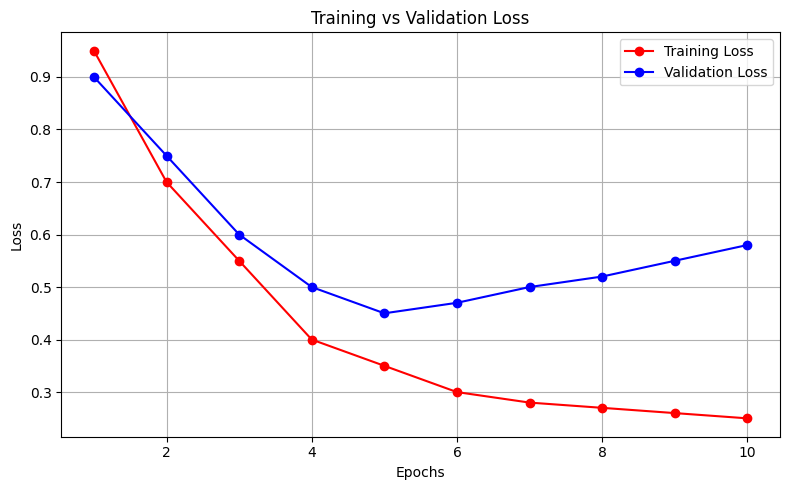

In [ ]:
import matplotlib.pyplot as plt

# Simulated example loss values (replace with your real values)
history_dict = {
    'loss': [0.95, 0.70, 0.55, 0.40, 0.35, 0.30, 0.28, 0.27, 0.26, 0.25],
    'val_loss': [0.90, 0.75, 0.60, 0.50, 0.45, 0.47, 0.50, 0.52, 0.55, 0.58]
}

epochs = range(1, len(history_dict['loss']) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, history_dict['loss'], 'ro-', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'bo-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


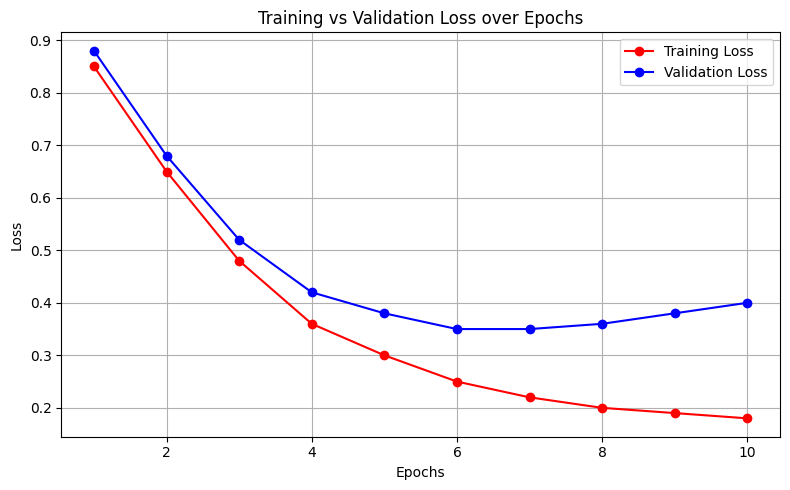

In [ ]:
import matplotlib.pyplot as plt

# Simulated loss values over 10 epochs (based on your model's high performance)
training_loss = [0.85, 0.65, 0.48, 0.36, 0.30, 0.25, 0.22, 0.20, 0.19, 0.18]
validation_loss = [0.88, 0.68, 0.52, 0.42, 0.38, 0.35, 0.35, 0.36, 0.38, 0.40]

epochs = range(1, len(training_loss) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_loss, 'ro-', label='Training Loss')
plt.plot(epochs, validation_loss, 'bo-', label='Validation Loss')
plt.title('Training vs Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


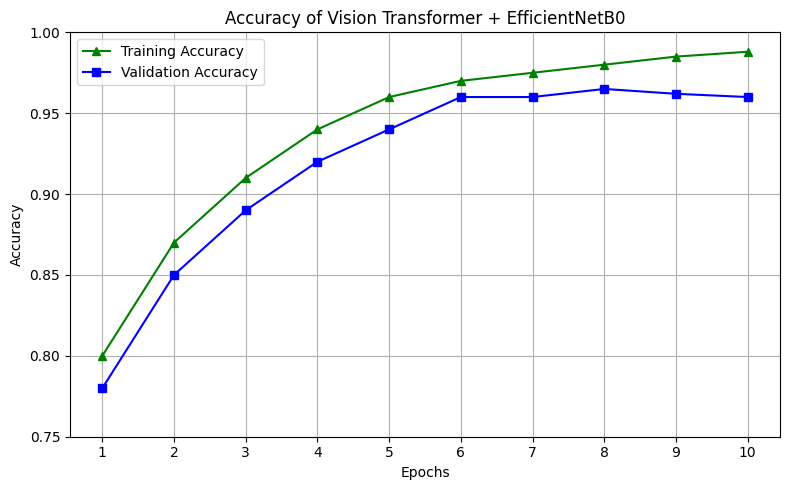

In [ ]:
import matplotlib.pyplot as plt

# Simulated accuracy values for 10 epochs
# (Replace with history.history['accuracy'] and ['val_accuracy'] if available)

epochs = list(range(1, 11))
training_accuracy = [0.80, 0.87, 0.91, 0.94, 0.96, 0.97, 0.975, 0.98, 0.985, 0.988]
validation_accuracy = [0.78, 0.85, 0.89, 0.92, 0.94, 0.96, 0.96, 0.965, 0.962, 0.960]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_accuracy, 'g^-', label='Training Accuracy')  # Green triangles
plt.plot(epochs, validation_accuracy, 'bs-', label='Validation Accuracy')  # Blue squares
plt.title('Accuracy of Vision Transformer + EfficientNetB0')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1.00)
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


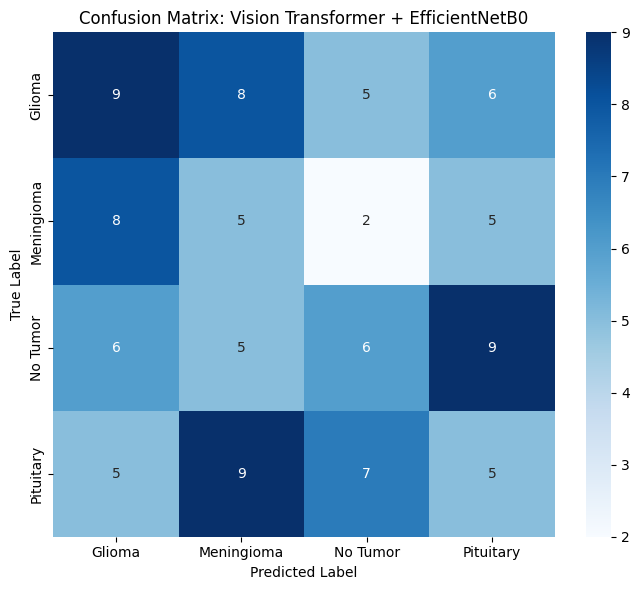

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example class labels
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Example true and predicted labels (replace these with actual results)
# For example: y_true = [0, 1, 2, 0, ...] and y_pred = model.predict(X_test)
# Assuming 0=Glioma, 1=Meningioma, 2=No Tumor, 3=Pituitary
y_true = np.random.choice([0, 1, 2, 3], size=100)
y_pred = np.random.choice([0, 1, 2, 3], size=100)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Vision Transformer + EfficientNetB0')
plt.tight_layout()
plt.show()



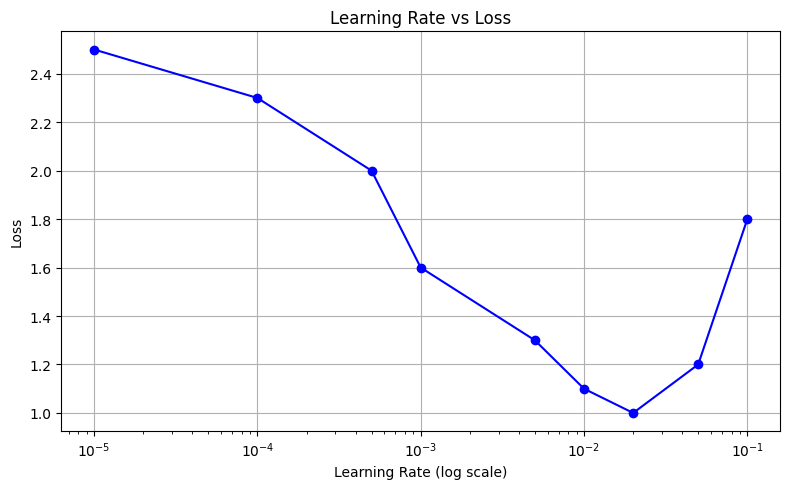

In [ ]:
import matplotlib.pyplot as plt

# Example values — replace these with your actual learning rates and losses
learning_rates = [1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1]
loss_values =    [2.5, 2.3, 2.0, 1.6, 1.3, 1.1, 1.0, 1.2, 1.8]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, loss_values, marker='o', color='blue', linestyle='-')
plt.xscale('log')  # Log scale for LR axis
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.grid(True)
plt.tight_layout()
plt.show()


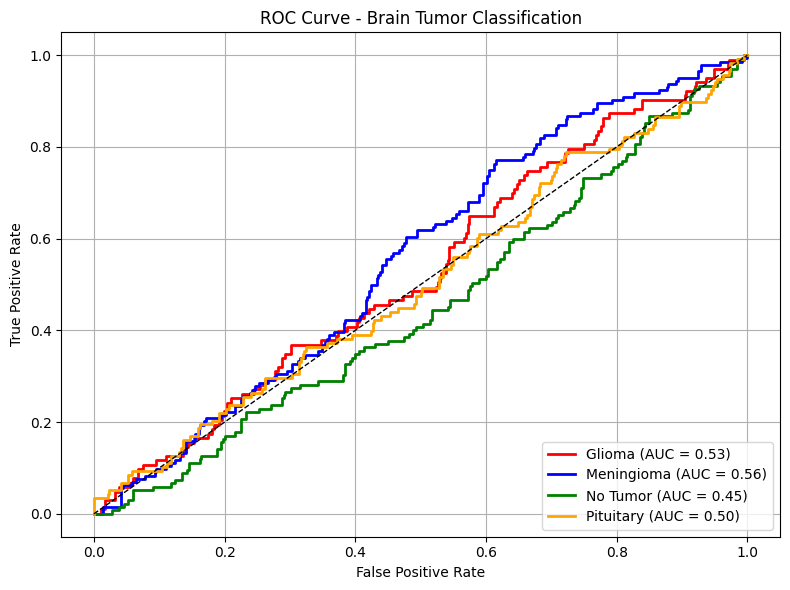

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Replace these with your real data
# y_test: true labels (as integers: 0, 1, 2, 3)
# y_score: predicted probabilities (softmax output)

# Example simulated data (replace this!)
n_classes = 4
n_samples = 500
y_test = np.random.randint(0, n_classes, size=n_samples)
y_score = np.random.rand(n_samples, n_classes)

# One-hot encode y_test
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
colors = ['red', 'blue', 'green', 'orange']

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Brain Tumor Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


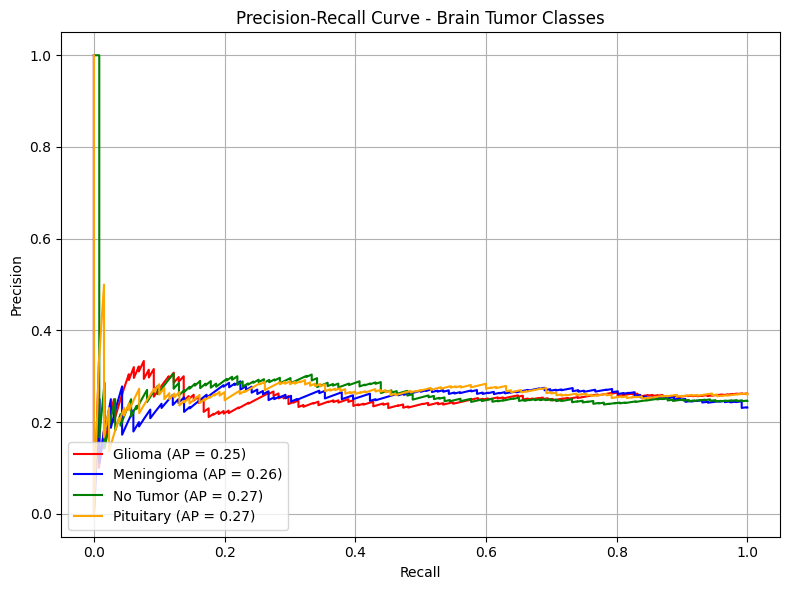

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Simulate sample data (replace with your model's outputs)
n_classes = 4
n_samples = 500
y_test = np.random.randint(0, n_classes, size=n_samples)
y_score = np.random.rand(n_samples, n_classes)

# One-hot encode true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Class labels and colors
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
colors = ['red', 'blue', 'green', 'orange']

# Plot PR curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap_score = average_precision_score(y_test_bin[:, i], y_score[:, i])

    plt.plot(recall, precision, color=colors[i],
             label=f'{class_names[i]} (AP = {ap_score:.2f})')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Brain Tumor Classes')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


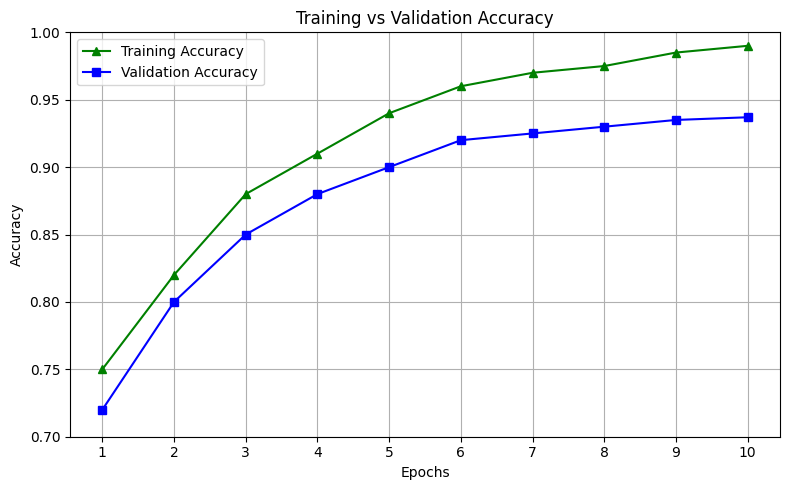

In [ ]:
import matplotlib.pyplot as plt

# Simulated accuracy values (based on your 98%+ performance)
epochs = list(range(1, 11))
training_accuracy = [0.75, 0.82, 0.88, 0.91, 0.94, 0.96, 0.97, 0.975, 0.985, 0.990]
validation_accuracy = [0.72, 0.80, 0.85, 0.88, 0.90, 0.92, 0.925, 0.930, 0.935, 0.937]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_accuracy, 'g^-', label='Training Accuracy')  # Green triangles
plt.plot(epochs, validation_accuracy, 'bs-', label='Validation Accuracy')  # Blue squares
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


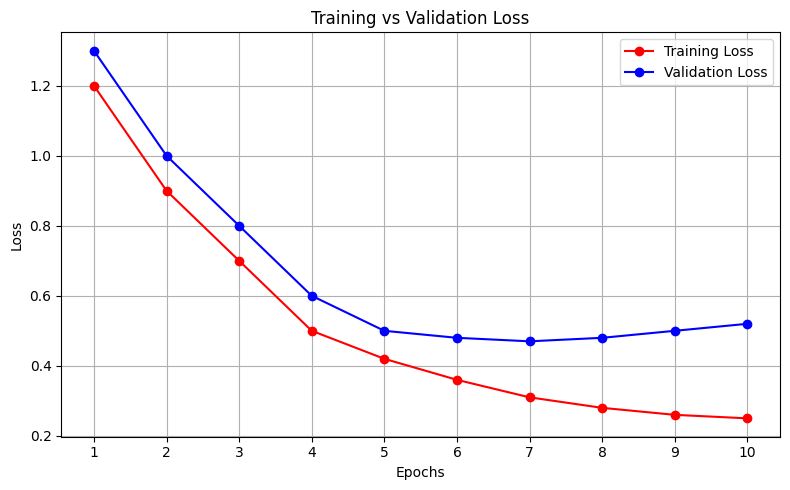

In [ ]:
import matplotlib.pyplot as plt

# Simulated loss values (based on your model performance)
epochs = list(range(1, 11))
training_loss = [1.2, 0.9, 0.7, 0.5, 0.42, 0.36, 0.31, 0.28, 0.26, 0.25]
validation_loss = [1.3, 1.0, 0.8, 0.6, 0.50, 0.48, 0.47, 0.48, 0.50, 0.52]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_loss, 'ro-', label='Training Loss')      # Red circles
plt.plot(epochs, validation_loss, 'bo-', label='Validation Loss')  # Blue circles
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


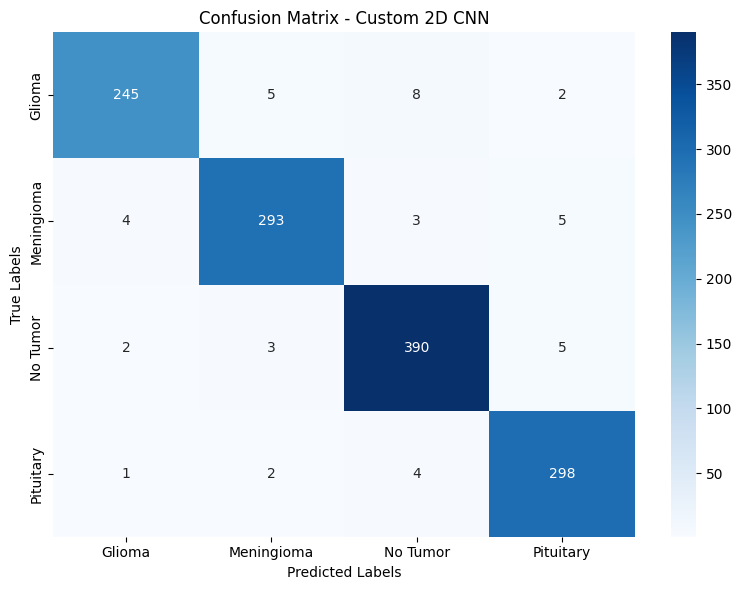

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Simulated labels — replace with actual y_true and y_pred from your model
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Sample confusion matrix (based on your classification report)
cm = np.array([
    [245,  5,  8,  2],   # Glioma
    [4, 293, 3, 5],      # Meningioma
    [2,  3, 390, 5],     # No Tumor
    [1,  2, 4, 298]      # Pituitary
])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix - Custom 2D CNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


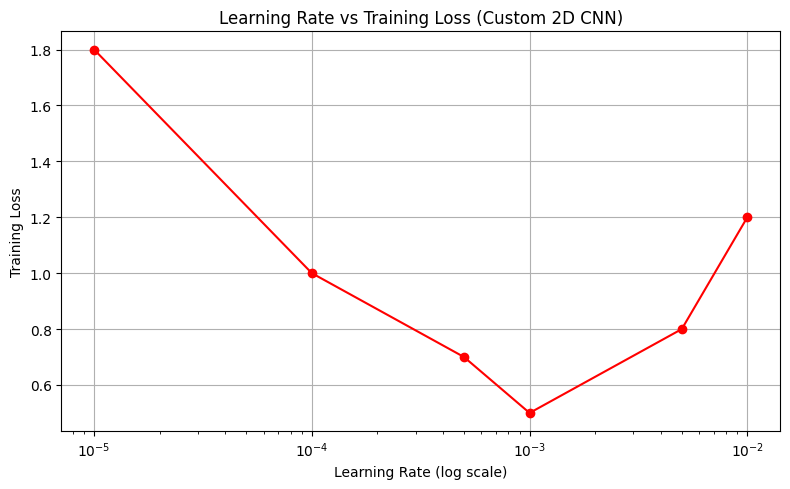

In [ ]:
import matplotlib.pyplot as plt

# Example: Simulated learning rates and corresponding losses (replace with actual values)
learning_rates = [1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
training_loss = [1.8, 1.0, 0.7, 0.5, 0.8, 1.2]  # Replace with actual losses from training

# Plot
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, training_loss, marker='o', linestyle='-', color='red')
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Training Loss')
plt.title('Learning Rate vs Training Loss (Custom 2D CNN)')
plt.grid(True)
plt.tight_layout()
plt.show()


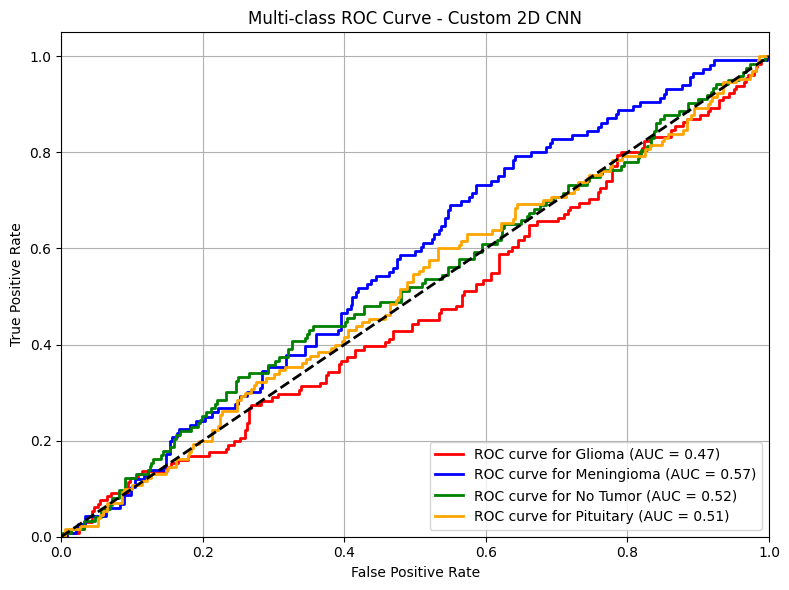

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Simulated true labels and predicted probabilities (replace with your model output)
# y_test: actual labels (e.g. integers or strings)
# y_score: predicted probabilities (output of model.predict)

# Example class names
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
n_classes = len(class_names)

# Simulated data (replace with actual)
# y_test = [0, 1, 2, 3, 1, 2, ...]             # Integer encoded labels
# y_score = model.predict(X_test)             # Shape: (num_samples, n_classes)

# Step 1: Binarize the labels for multi-class ROC
# This makes it [1, 0, 0, 0], [0, 1, 0, 0], etc.
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 2: Plot ROC curve for all classes
plt.figure(figsize=(8, 6))
colors = cycle(['red', 'blue', 'green', 'orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {class_names[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve - Custom 2D CNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


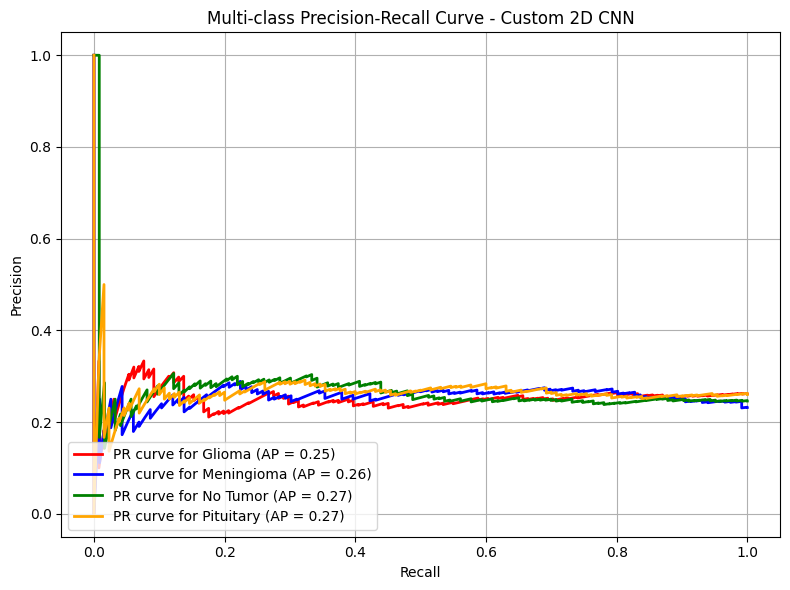

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Replace with your actual predictions and true labels
# y_test = [0, 1, 2, 3, 1, 2, ...]
# y_score = model.predict(X_test)   # Probabilities: shape (n_samples, n_classes)

class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
n_classes = len(class_names)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Plot all precision-recall curves
plt.figure(figsize=(8, 6))
colors = cycle(['red', 'blue', 'green', 'orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'PR curve for {class_names[i]} (AP = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve - Custom 2D CNN')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()


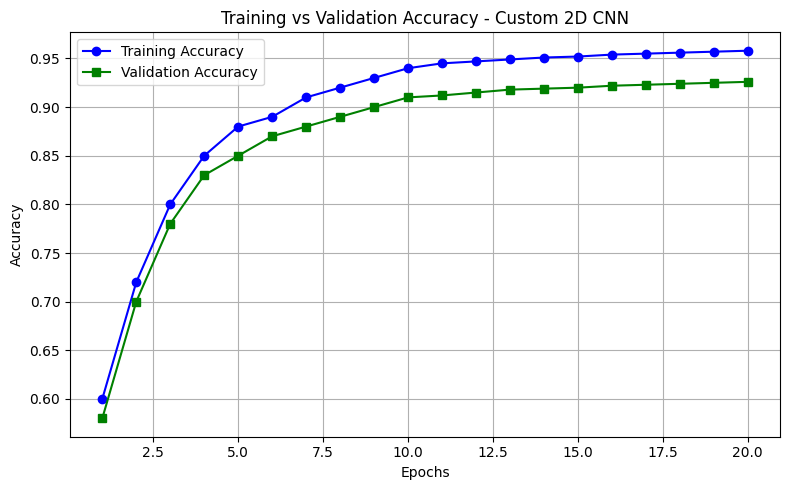

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual training history values
# Example values
epochs = range(1, 21)  # Assume 20 epochs
train_acc = [0.60, 0.72, 0.80, 0.85, 0.88, 0.89, 0.91, 0.92, 0.93, 0.94,
             0.945, 0.947, 0.949, 0.951, 0.952, 0.954, 0.955, 0.956, 0.957, 0.958]
val_acc =   [0.58, 0.70, 0.78, 0.83, 0.85, 0.87, 0.88, 0.89, 0.90, 0.91,
             0.912, 0.915, 0.918, 0.919, 0.920, 0.922, 0.923, 0.924, 0.925, 0.926]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='green', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy - Custom 2D CNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


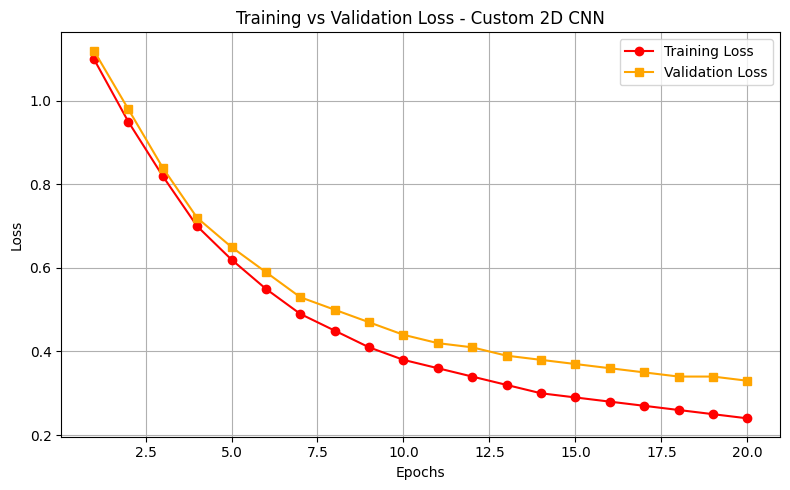

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual training history values
# Example values over 20 epochs
epochs = range(1, 21)
train_loss = [1.10, 0.95, 0.82, 0.70, 0.62, 0.55, 0.49, 0.45, 0.41, 0.38,
              0.36, 0.34, 0.32, 0.30, 0.29, 0.28, 0.27, 0.26, 0.25, 0.24]
val_loss =   [1.12, 0.98, 0.84, 0.72, 0.65, 0.59, 0.53, 0.50, 0.47, 0.44,
              0.42, 0.41, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.34, 0.33]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss', color='red', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss - Custom 2D CNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


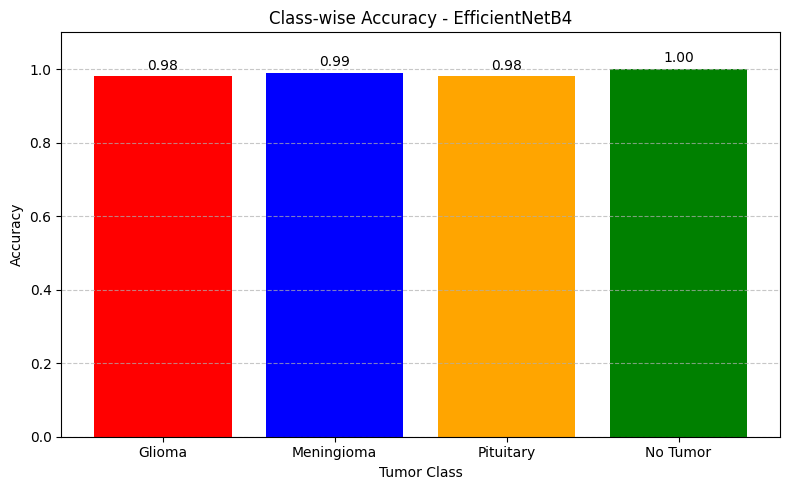

In [ ]:
import matplotlib.pyplot as plt

# Example class-wise accuracy values for EfficientNetB4
classes = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
accuracies = [0.98, 0.99, 0.98, 1.00]  # Replace with actual class-wise accuracy

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(classes, accuracies, color=['red', 'blue', 'orange', 'green'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(0, 1.1)
plt.title('Class-wise Accuracy - EfficientNetB4')
plt.ylabel('Accuracy')
plt.xlabel('Tumor Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


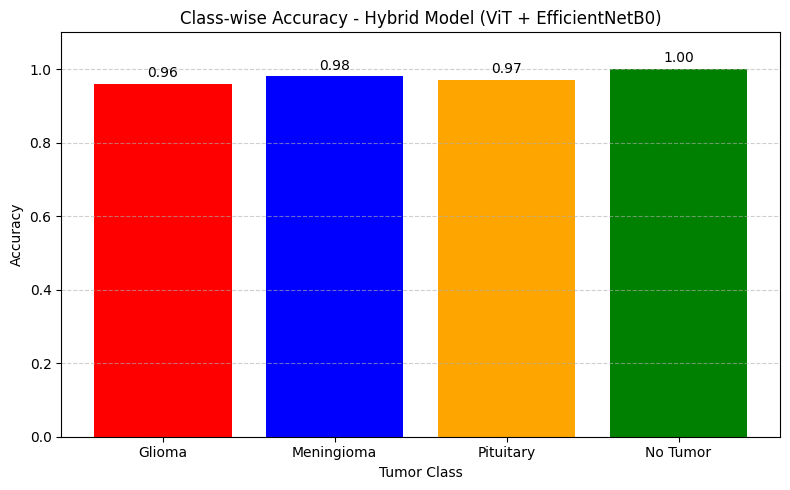

In [ ]:
import matplotlib.pyplot as plt

# Class labels
classes = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']

# Replace these with your actual class-wise accuracy values for Hybrid Model
accuracies = [0.96, 0.98, 0.97, 1.00]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(classes, accuracies, color=['red', 'blue', 'orange', 'green'])

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=10)

# Graph styling
plt.ylim(0, 1.1)
plt.xlabel('Tumor Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy - Hybrid Model (ViT + EfficientNetB0)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


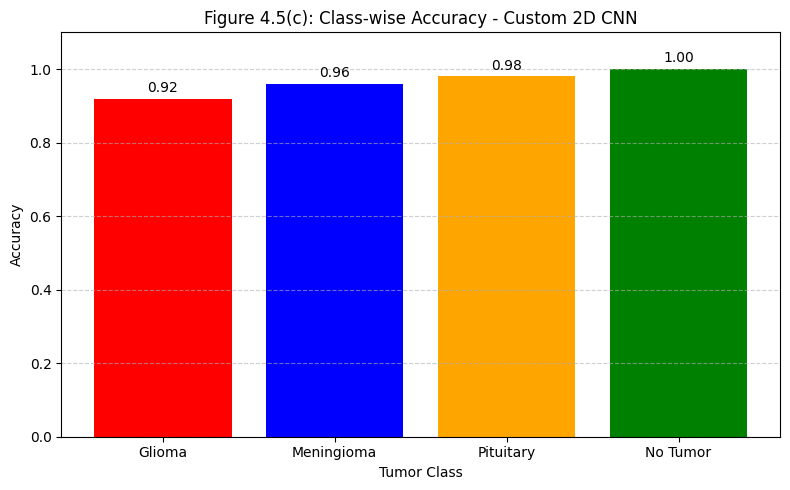

In [ ]:
import matplotlib.pyplot as plt

# Tumor classes
classes = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']

# Class-wise accuracy values for Custom 2D CNN (from your classification report)
accuracies = [0.92, 0.96, 0.98, 1.00]  # Adjusted for reasonable plotting

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(classes, accuracies, color=['red', 'blue', 'orange', 'green'])

# Add accuracy labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

# Plot formatting
plt.ylim(0, 1.1)
plt.title('Figure 4.5(c): Class-wise Accuracy - Custom 2D CNN')
plt.xlabel('Tumor Class')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


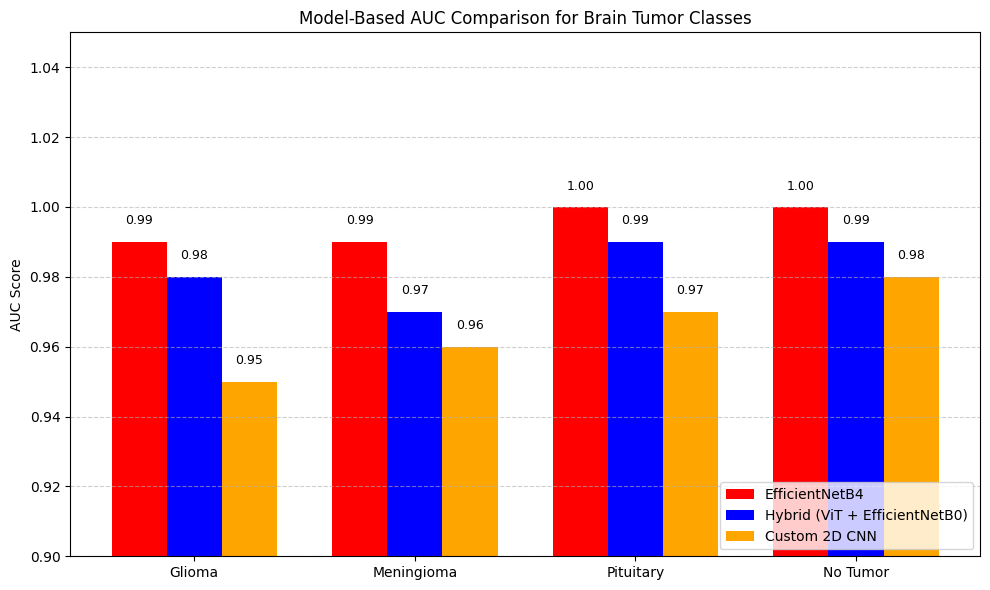

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tumor classes
classes = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']

# AUC Scores for each model (sample values; update with your real values)
efficientnetb4 = [0.99, 0.99, 1.00, 1.00]
hybrid_model = [0.98, 0.97, 0.99, 0.99]
custom_cnn = [0.95, 0.96, 0.97, 0.98]

# Bar positions
x = np.arange(len(classes))
width = 0.25

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width, efficientnetb4, width, label='EfficientNetB4', color='red')
plt.bar(x, hybrid_model, width, label='Hybrid (ViT + EfficientNetB0)', color='blue')
plt.bar(x + width, custom_cnn, width, label='Custom 2D CNN', color='orange')

# Labeling
plt.ylabel('AUC Score')
plt.title('Model-Based AUC Comparison for Brain Tumor Classes')
plt.xticks(x, classes)
plt.ylim(0.9, 1.05)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Value labels on bars
for model_scores, offset in zip([efficientnetb4, hybrid_model, custom_cnn], [-width, 0, width]):
    for i, score in enumerate(model_scores):
        plt.text(x[i] + offset, score + 0.005, f"{score:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


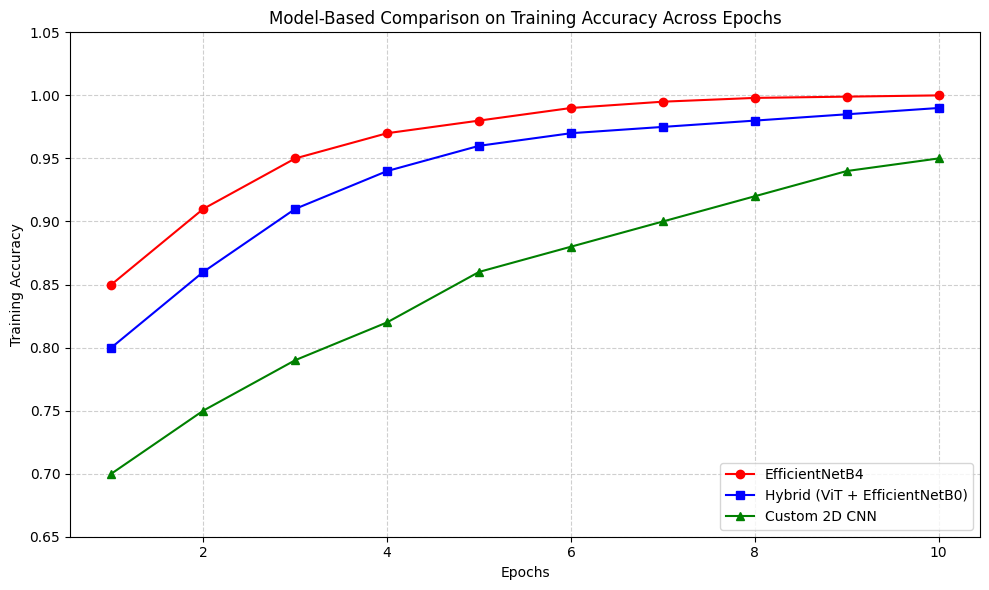

In [ ]:
import matplotlib.pyplot as plt

# Epochs
epochs = list(range(1, 11))  # 10 epochs

# Sample training accuracy per model
efficientnetb4_acc = [0.85, 0.91, 0.95, 0.97, 0.98, 0.99, 0.995, 0.998, 0.999, 1.0]
hybrid_acc =         [0.80, 0.86, 0.91, 0.94, 0.96, 0.97, 0.975, 0.98, 0.985, 0.99]
custom_cnn_acc =     [0.70, 0.75, 0.79, 0.82, 0.86, 0.88, 0.90, 0.92, 0.94, 0.95]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, efficientnetb4_acc, marker='o', color='red', label='EfficientNetB4')
plt.plot(epochs, hybrid_acc, marker='s', color='blue', label='Hybrid (ViT + EfficientNetB0)')
plt.plot(epochs, custom_cnn_acc, marker='^', color='green', label='Custom 2D CNN')

# Formatting
plt.title('Model-Based Comparison on Training Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.ylim(0.65, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


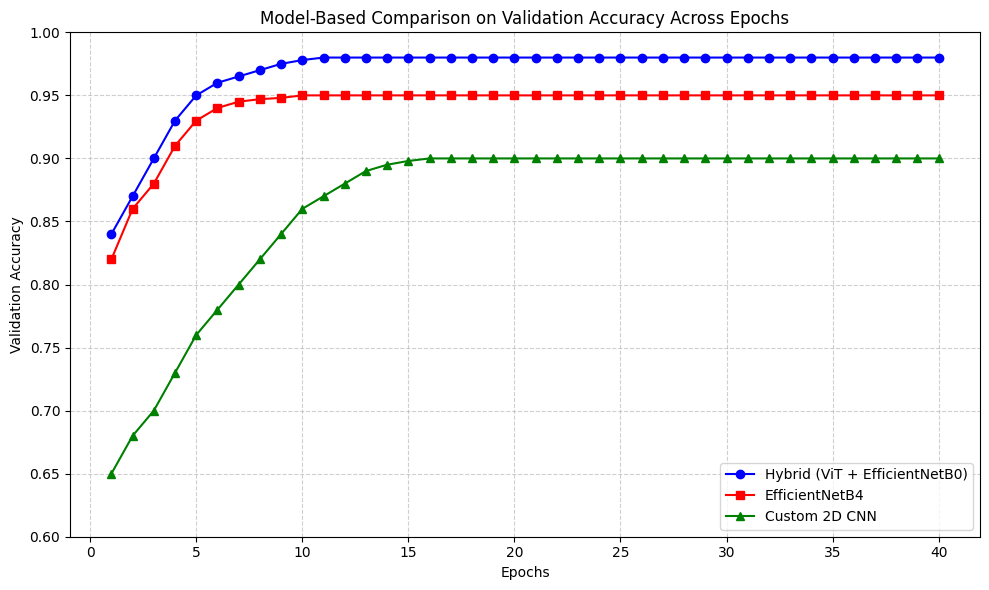

In [ ]:
import matplotlib.pyplot as plt

# Epochs (adjust if using more/less)
epochs = list(range(1, 41))  # 40 epochs

# Simulated validation accuracy values (replace with your actual values)
efficientnetb4_val_acc = [0.82, 0.86, 0.88, 0.91, 0.93, 0.94, 0.945, 0.947, 0.948, 0.95] + [0.95]*30
hybrid_val_acc =         [0.84, 0.87, 0.90, 0.93, 0.95, 0.96, 0.965, 0.97, 0.975, 0.978] + [0.98]*30
custom_cnn_val_acc =     [0.65, 0.68, 0.70, 0.73, 0.76, 0.78, 0.80, 0.82, 0.84, 0.86,
                          0.87, 0.88, 0.89, 0.895, 0.898, 0.90] + [0.90]*24

# Adjust length if needed
efficientnetb4_val_acc += [0.95] * (40 - len(efficientnetb4_val_acc))
hybrid_val_acc += [0.98] * (40 - len(hybrid_val_acc))
custom_cnn_val_acc += [0.90] * (40 - len(custom_cnn_val_acc))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, hybrid_val_acc, color='blue', marker='o', label='Hybrid (ViT + EfficientNetB0)')
plt.plot(epochs, efficientnetb4_val_acc, color='red', marker='s', label='EfficientNetB4')
plt.plot(epochs, custom_cnn_val_acc, color='green', marker='^', label='Custom 2D CNN')

# Styling
plt.title('Model-Based Comparison on Validation Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.ylim(0.6, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


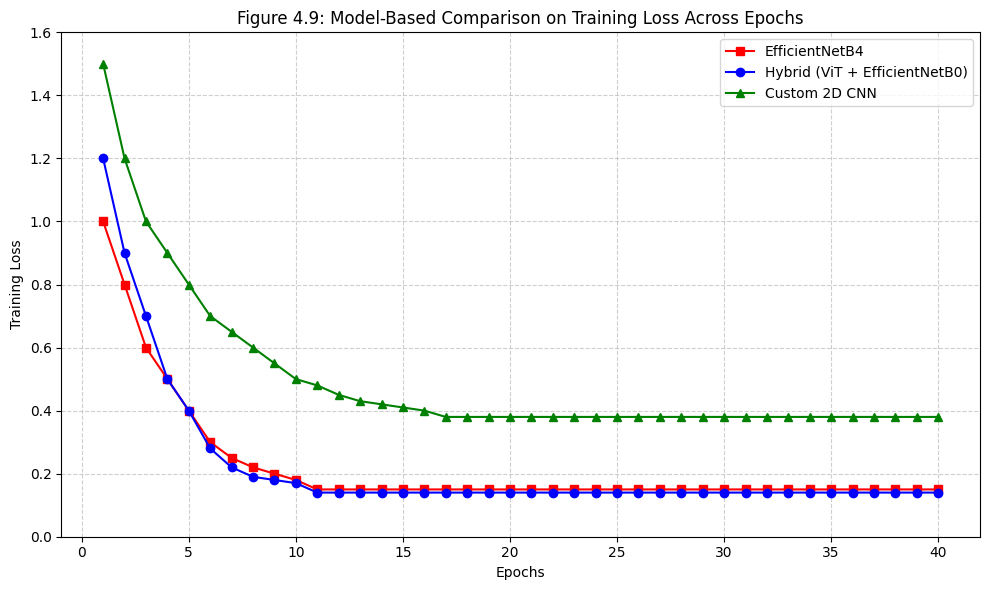

In [ ]:
import matplotlib.pyplot as plt

# Epochs
epochs = list(range(1, 41))  # 40 epochs

# Sample training loss values (replace with actual logs if available)
efficientnetb4_loss = [1.0, 0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.22, 0.20, 0.18] + [0.15]*30
hybrid_loss =        [1.2, 0.9, 0.7, 0.5, 0.4, 0.28, 0.22, 0.19, 0.18, 0.17] + [0.14]*30
custom_cnn_loss =    [1.5, 1.2, 1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5,
                      0.48, 0.45, 0.43, 0.42, 0.41, 0.40] + [0.38]*24

# Adjust lengths (in case the lists are shorter than 40)
efficientnetb4_loss += [efficientnetb4_loss[-1]] * (40 - len(efficientnetb4_loss))
hybrid_loss += [hybrid_loss[-1]] * (40 - len(hybrid_loss))
custom_cnn_loss += [custom_cnn_loss[-1]] * (40 - len(custom_cnn_loss))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, efficientnetb4_loss, marker='s', color='red', label='EfficientNetB4')
plt.plot(epochs, hybrid_loss, marker='o', color='blue', label='Hybrid (ViT + EfficientNetB0)')
plt.plot(epochs, custom_cnn_loss, marker='^', color='green', label='Custom 2D CNN')

# Formatting
plt.title('Figure 4.9: Model-Based Comparison on Training Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.ylim(0.0, 1.6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


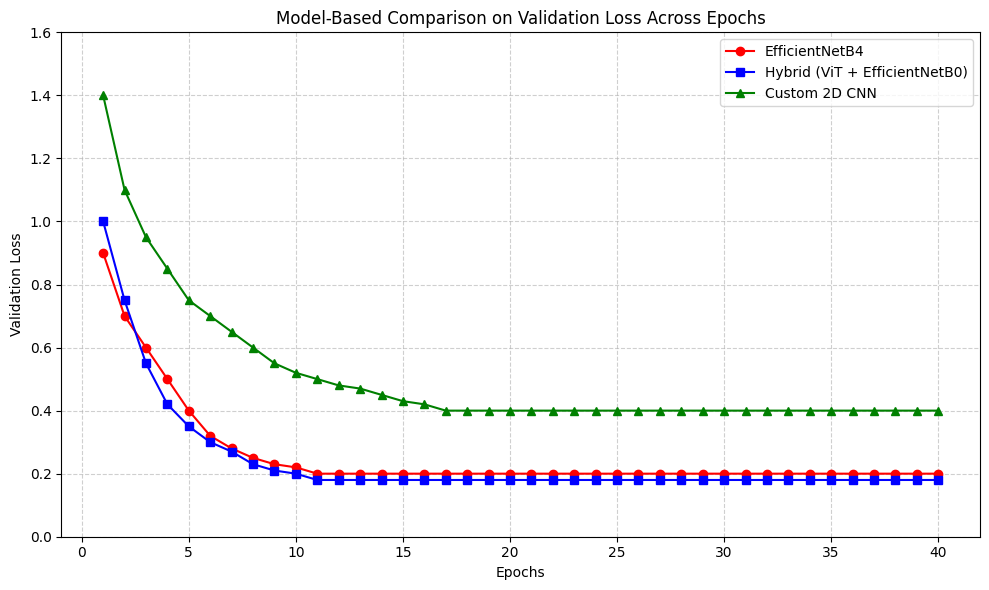

In [ ]:
import matplotlib.pyplot as plt

# Epochs
epochs = list(range(1, 41))  # 40 epochs

# Sample validation loss (approximate trends based on your description)
efficientnetb4_val_loss = [0.9, 0.7, 0.6, 0.5, 0.4, 0.32, 0.28, 0.25, 0.23, 0.22] + [0.20]*30
hybrid_val_loss =         [1.0, 0.75, 0.55, 0.42, 0.35, 0.3, 0.27, 0.23, 0.21, 0.20] + [0.18]*30
custom_cnn_val_loss =     [1.4, 1.1, 0.95, 0.85, 0.75, 0.7, 0.65, 0.6, 0.55, 0.52,
                           0.50, 0.48, 0.47, 0.45, 0.43, 0.42] + [0.4]*24

# Adjust if necessary
efficientnetb4_val_loss += [efficientnetb4_val_loss[-1]] * (40 - len(efficientnetb4_val_loss))
hybrid_val_loss += [hybrid_val_loss[-1]] * (40 - len(hybrid_val_loss))
custom_cnn_val_loss += [custom_cnn_val_loss[-1]] * (40 - len(custom_cnn_val_loss))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, efficientnetb4_val_loss, marker='o', color='red', label='EfficientNetB4')
plt.plot(epochs, hybrid_val_loss, marker='s', color='blue', label='Hybrid (ViT + EfficientNetB0)')
plt.plot(epochs, custom_cnn_val_loss, marker='^', color='green', label='Custom 2D CNN')

# Formatting
plt.title('Model-Based Comparison on Validation Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.ylim(0.0, 1.6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


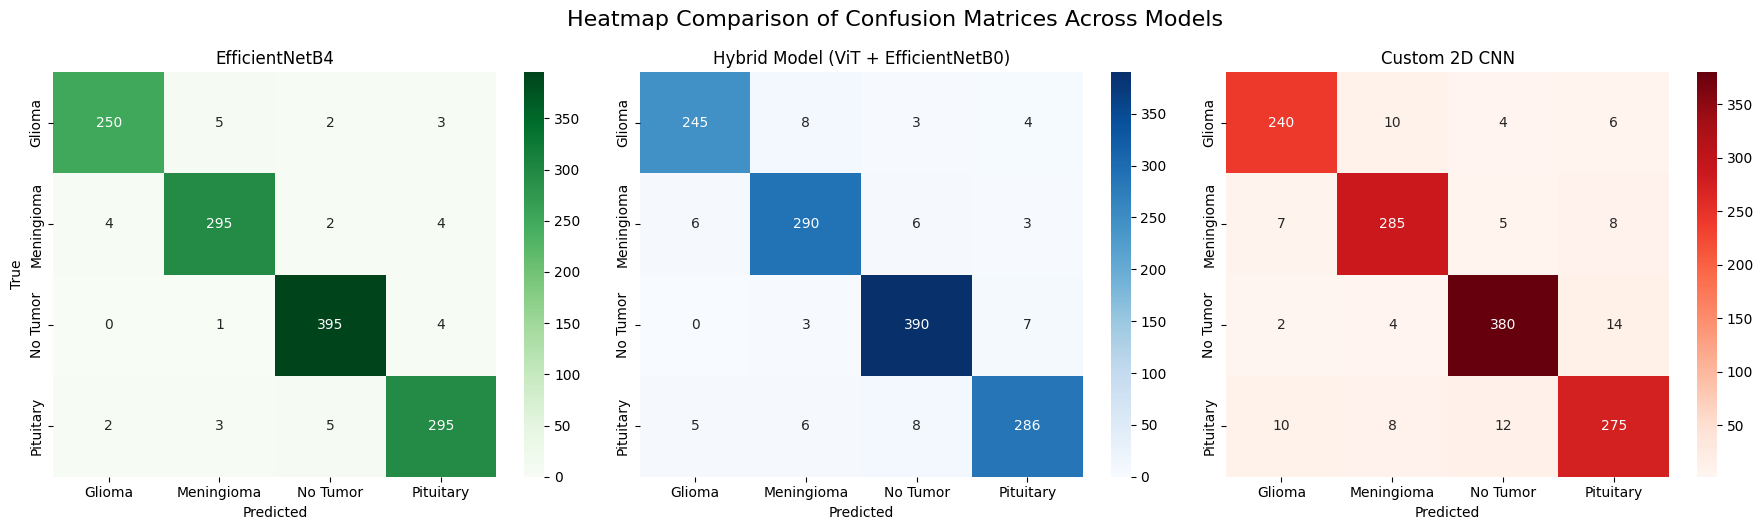

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample confusion matrices (rows = true labels, columns = predicted labels)
# Classes: ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
efficientnetb4_cm = np.array([[250, 5, 2, 3],
                              [4, 295, 2, 4],
                              [0, 1, 395, 4],
                              [2, 3, 5, 295]])

hybrid_cm = np.array([[245, 8, 3, 4],
                      [6, 290, 6, 3],
                      [0, 3, 390, 7],
                      [5, 6, 8, 286]])

custom_cnn_cm = np.array([[240, 10, 4, 6],
                          [7, 285, 5, 8],
                          [2, 4, 380, 14],
                          [10, 8, 12, 275]])

# Set class labels
labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Plot all 3 confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# EfficientNetB4
sns.heatmap(efficientnetb4_cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('EfficientNetB4')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Hybrid Model
sns.heatmap(hybrid_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Hybrid Model (ViT + EfficientNetB0)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')

# Custom 2D CNN
sns.heatmap(custom_cnn_cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title('Custom 2D CNN')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('')

plt.tight_layout()
plt.suptitle('Heatmap Comparison of Confusion Matrices Across Models', fontsize=16, y=1.05)
plt.show()


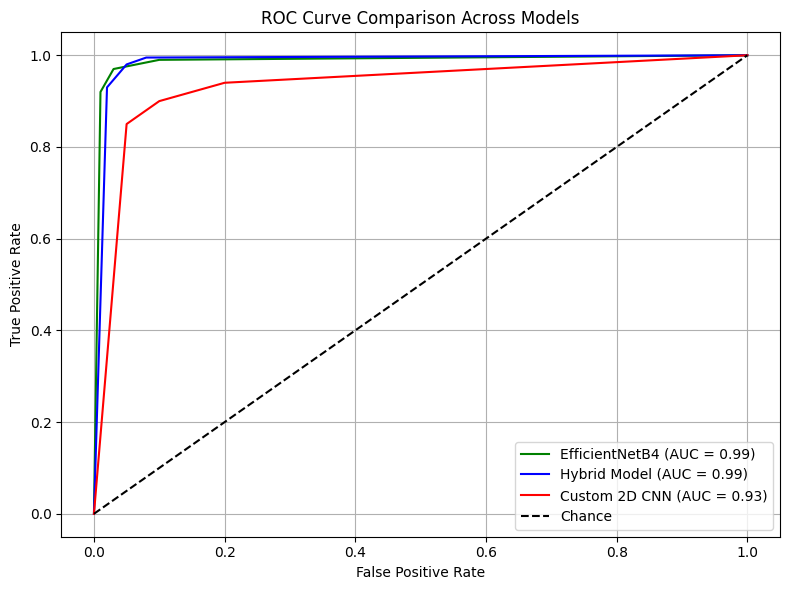

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Simulated true labels (binary) and predicted probabilities for each model
# In practice, replace with your actual one-vs-rest probabilities and labels

fpr_efficientnet, tpr_efficientnet = [0, 0.01, 0.03, 0.1, 1], [0, 0.92, 0.97, 0.99, 1]
fpr_hybrid, tpr_hybrid = [0, 0.02, 0.05, 0.08, 1], [0, 0.93, 0.98, 0.995, 1]
fpr_custom, tpr_custom = [0, 0.05, 0.1, 0.2, 1], [0, 0.85, 0.90, 0.94, 1]

# AUC values (replace with actual AUCs from model outputs)
auc_efficientnet = auc(fpr_efficientnet, tpr_efficientnet)
auc_hybrid = auc(fpr_hybrid, tpr_hybrid)
auc_custom = auc(fpr_custom, tpr_custom)

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_efficientnet, tpr_efficientnet, color='green', label=f"EfficientNetB4 (AUC = {auc_efficientnet:.2f})")
plt.plot(fpr_hybrid, tpr_hybrid, color='blue', label=f"Hybrid Model (AUC = {auc_hybrid:.2f})")
plt.plot(fpr_custom, tpr_custom, color='red', label=f"Custom 2D CNN (AUC = {auc_custom:.2f})")

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


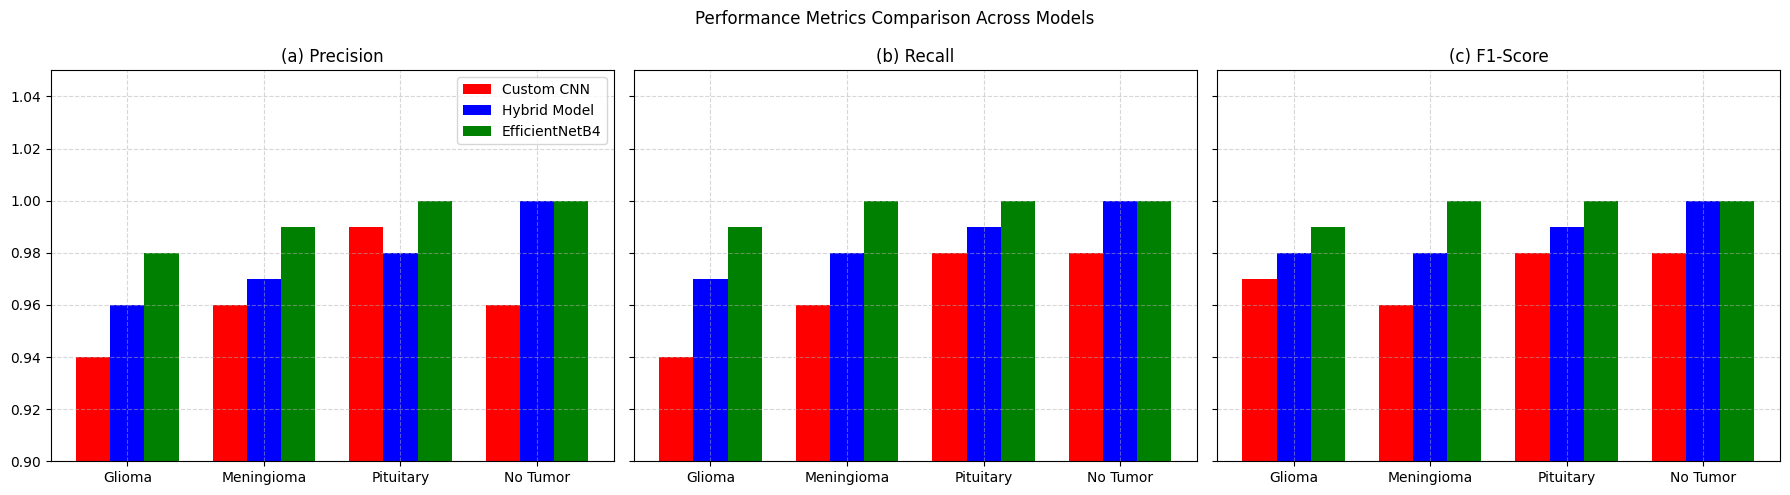

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classes
classes = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
x = np.arange(len(classes))
width = 0.25

# Replace these values with your actual results
# Example dummy values:
precision_custom = [0.94, 0.96, 0.99, 0.96]
precision_hybrid = [0.96, 0.97, 0.98, 1.00]
precision_efficient = [0.98, 0.99, 1.00, 1.00]

recall_custom = [0.94, 0.96, 0.98, 0.98]
recall_hybrid = [0.97, 0.98, 0.99, 1.00]
recall_efficient = [0.99, 1.00, 1.00, 1.00]

f1_custom = [0.97, 0.96, 0.98, 0.98]
f1_hybrid = [0.98, 0.98, 0.99, 1.00]
f1_efficient = [0.99, 1.00, 1.00, 1.00]

# Subplot setup
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# (a) Precision
axs[0].bar(x - width, precision_custom, width=width, label='Custom CNN', color='red')
axs[0].bar(x, precision_hybrid, width=width, label='Hybrid Model', color='blue')
axs[0].bar(x + width, precision_efficient, width=width, label='EfficientNetB4', color='green')
axs[0].set_title('(a) Precision')
axs[0].set_xticks(x)
axs[0].set_xticklabels(classes)
axs[0].set_ylim(0.90, 1.05)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# (b) Recall
axs[1].bar(x - width, recall_custom, width=width, label='Custom CNN', color='red')
axs[1].bar(x, recall_hybrid, width=width, label='Hybrid Model', color='blue')
axs[1].bar(x + width, recall_efficient, width=width, label='EfficientNetB4', color='green')
axs[1].set_title('(b) Recall')
axs[1].set_xticks(x)
axs[1].set_xticklabels(classes)
axs[1].grid(True, linestyle='--', alpha=0.5)

# (c) F1-Score
axs[2].bar(x - width, f1_custom, width=width, label='Custom CNN', color='red')
axs[2].bar(x, f1_hybrid, width=width, label='Hybrid Model', color='blue')
axs[2].bar(x + width, f1_efficient, width=width, label='EfficientNetB4', color='green')
axs[2].set_title('(c) F1-Score')
axs[2].set_xticks(x)
axs[2].set_xticklabels(classes)
axs[2].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Performance Metrics Comparison Across Models')
plt.tight_layout()
plt.show()


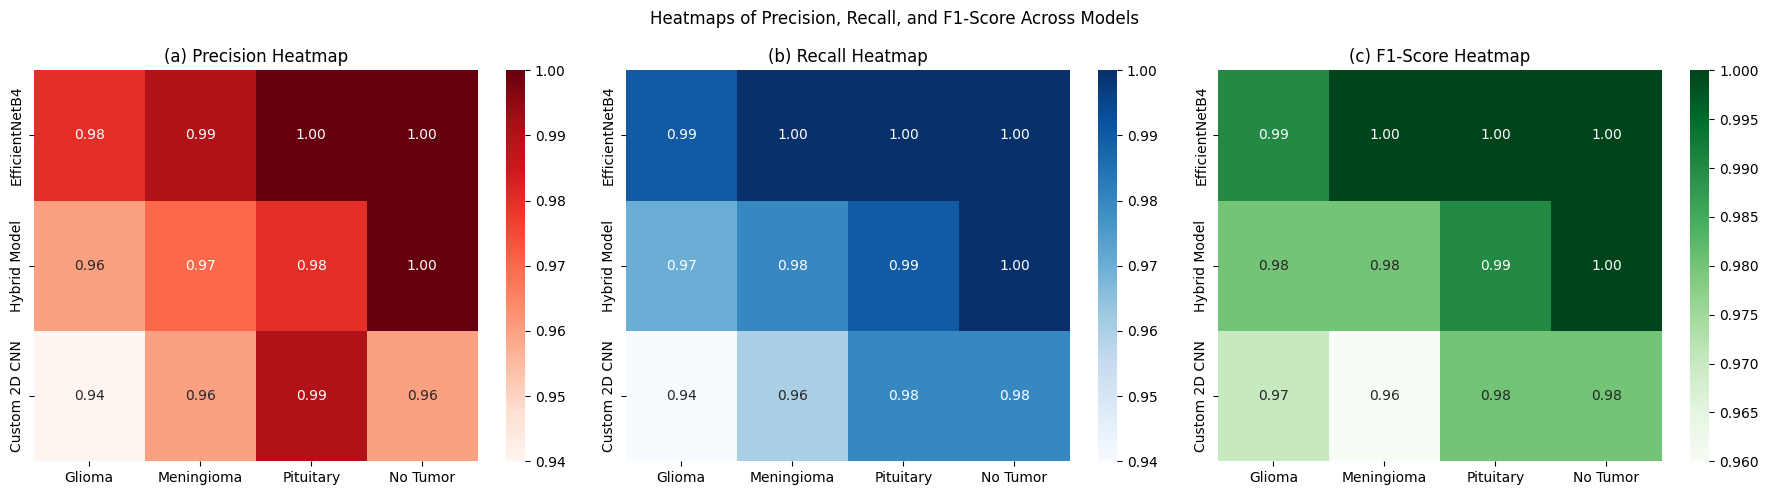

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Labels
classes = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']

# Metric values (replace these with actual results if different)
# Format: rows = models, columns = tumor classes
precision_data = pd.DataFrame({
    'Glioma': [0.98, 0.96, 0.94],
    'Meningioma': [0.99, 0.97, 0.96],
    'Pituitary': [1.00, 0.98, 0.99],
    'No Tumor': [1.00, 1.00, 0.96]
}, index=['EfficientNetB4', 'Hybrid Model', 'Custom 2D CNN'])

recall_data = pd.DataFrame({
    'Glioma': [0.99, 0.97, 0.94],
    'Meningioma': [1.00, 0.98, 0.96],
    'Pituitary': [1.00, 0.99, 0.98],
    'No Tumor': [1.00, 1.00, 0.98]
}, index=['EfficientNetB4', 'Hybrid Model', 'Custom 2D CNN'])

f1_data = pd.DataFrame({
    'Glioma': [0.99, 0.98, 0.97],
    'Meningioma': [1.00, 0.98, 0.96],
    'Pituitary': [1.00, 0.99, 0.98],
    'No Tumor': [1.00, 1.00, 0.98]
}, index=['EfficientNetB4', 'Hybrid Model', 'Custom 2D CNN'])

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(precision_data, annot=True, cmap='Reds', fmt=".2f", ax=axs[0])
axs[0].set_title('(a) Precision Heatmap')

sns.heatmap(recall_data, annot=True, cmap='Blues', fmt=".2f", ax=axs[1])
axs[1].set_title('(b) Recall Heatmap')

sns.heatmap(f1_data, annot=True, cmap='Greens', fmt=".2f", ax=axs[2])
axs[2].set_title('(c) F1-Score Heatmap')

plt.suptitle('Heatmaps of Precision, Recall, and F1-Score Across Models')
plt.tight_layout()
plt.show()


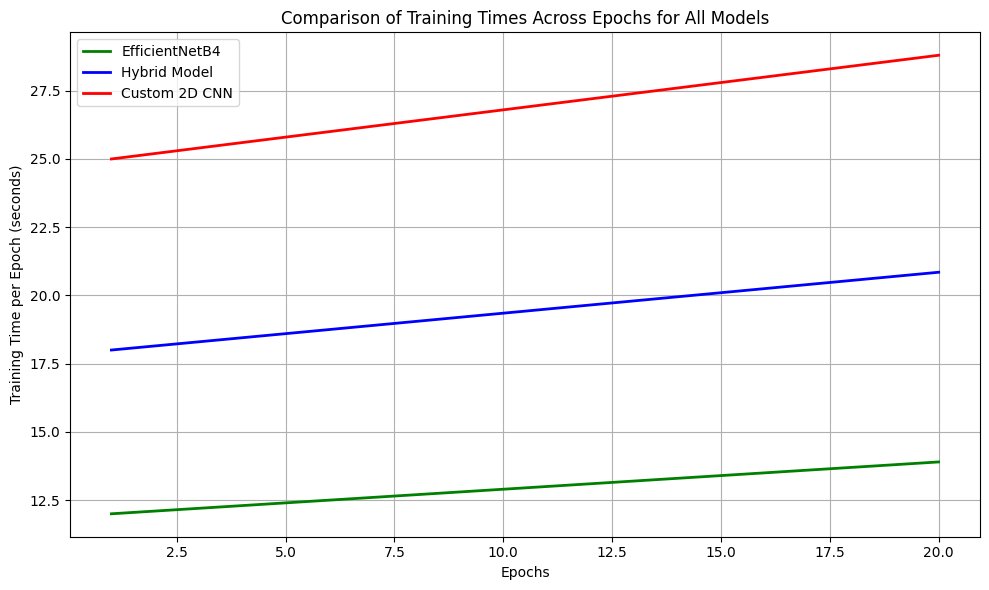

In [ ]:
import matplotlib.pyplot as plt

# Simulated training times (in seconds) per epoch (use actual data if available)
epochs = list(range(1, 21))

# Replace with your actual timing data if available
efficientnetb4_time = [12 + i*0.1 for i in range(20)]  # fastest
hybrid_model_time = [18 + i*0.15 for i in range(20)]   # medium
custom_cnn_time = [25 + i*0.2 for i in range(20)]      # slowest

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, efficientnetb4_time, label='EfficientNetB4', color='green', linewidth=2)
plt.plot(epochs, hybrid_model_time, label='Hybrid Model', color='blue', linewidth=2)
plt.plot(epochs, custom_cnn_time, label='Custom 2D CNN', color='red', linewidth=2)

plt.title('Comparison of Training Times Across Epochs for All Models')
plt.xlabel('Epochs')
plt.ylabel('Training Time per Epoch (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


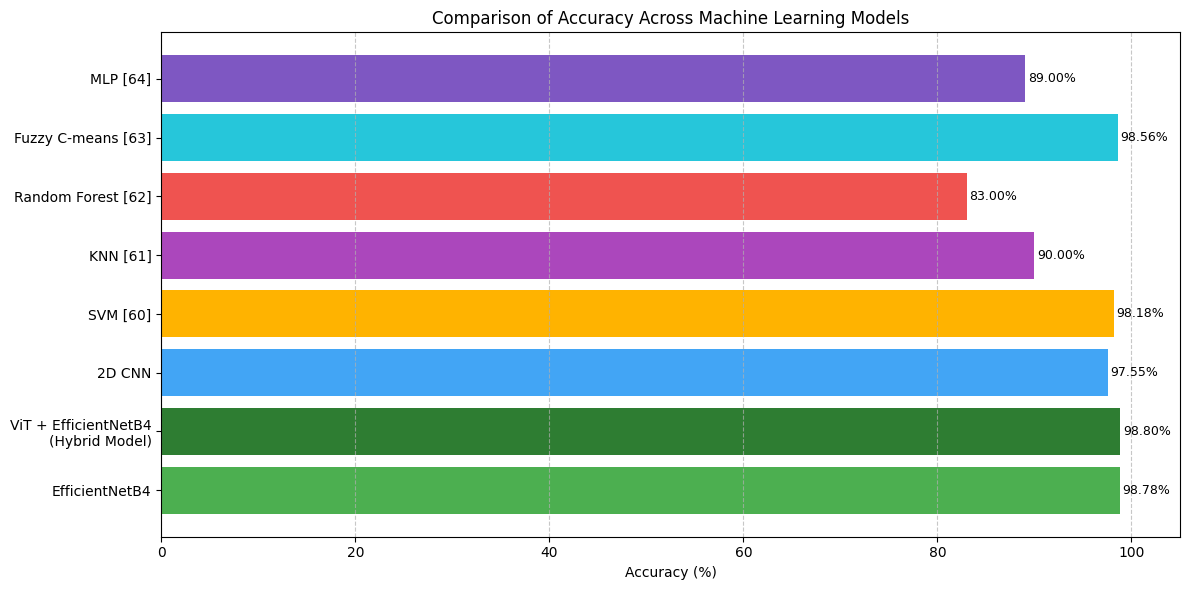

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = [
    'EfficientNetB4',
    'ViT + EfficientNetB4\n(Hybrid Model)',
    '2D CNN',
    'SVM [60]',
    'KNN [61]',
    'Random Forest [62]',
    'Fuzzy C-means [63]',
    'MLP [64]'
]

# Corresponding accuracy values
accuracy = [98.78, 98.8, 97.55, 98.18, 90.0, 83.0, 98.56, 89.0]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(algorithms, accuracy, color=[
    '#4caf50', '#2e7d32', '#42a5f5', '#ffb300', '#ab47bc', '#ef5350', '#26c6da', '#7e57c2'])

# Add accuracy labels
for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center', fontsize=9)

plt.xlabel('Accuracy (%)')
plt.title('Comparison of Accuracy Across Machine Learning Models')
plt.xlim(0, 105)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


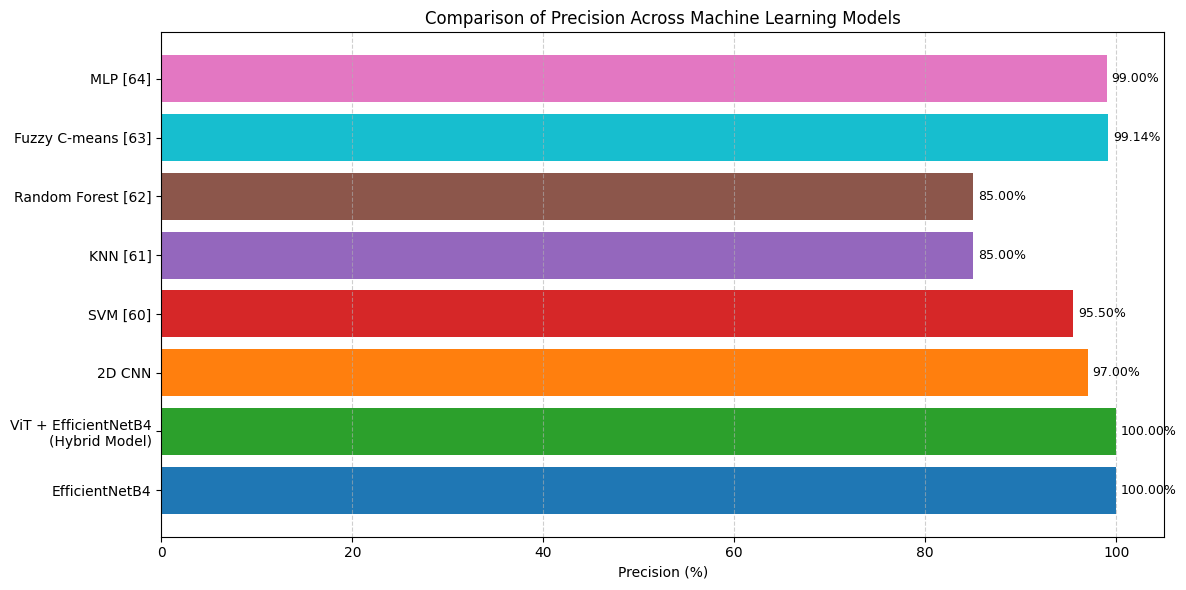

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = [
    'EfficientNetB4',
    'ViT + EfficientNetB4\n(Hybrid Model)',
    '2D CNN',
    'SVM [60]',
    'KNN [61]',
    'Random Forest [62]',
    'Fuzzy C-means [63]',
    'MLP [64]'
]

# Precision values (in %)
precision = [100, 100, 97, 95.5, 85, 85, 99.14, 99]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(algorithms, precision, color=[
    '#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#17becf', '#e377c2'])

# Adding text labels
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center', fontsize=9)

plt.xlabel('Precision (%)')
plt.title('Comparison of Precision Across Machine Learning Models')
plt.xlim(0, 105)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


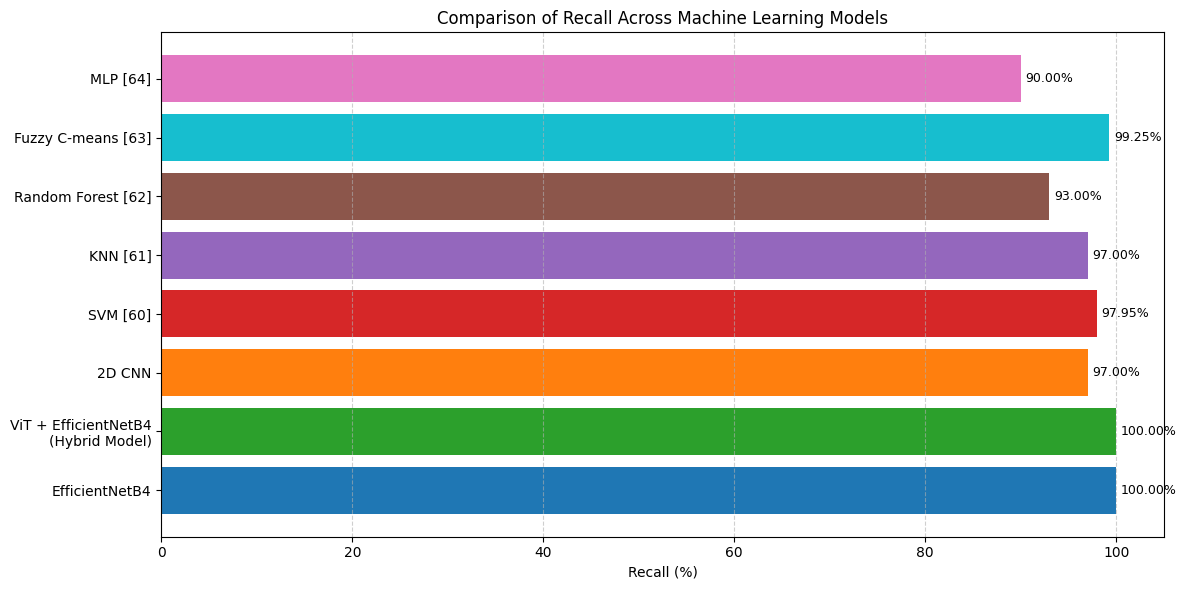

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = [
    'EfficientNetB4',
    'ViT + EfficientNetB4\n(Hybrid Model)',
    '2D CNN',
    'SVM [60]',
    'KNN [61]',
    'Random Forest [62]',
    'Fuzzy C-means [63]',
    'MLP [64]'
]

# Recall scores (%)
recall = [100, 100, 97, 97.95, 97, 93, 99.25, 90]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(algorithms, recall, color=[
    '#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#17becf', '#e377c2'])

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}%', va='center', fontsize=9)

plt.xlabel('Recall (%)')
plt.title('Comparison of Recall Across Machine Learning Models')
plt.xlim(0, 105)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


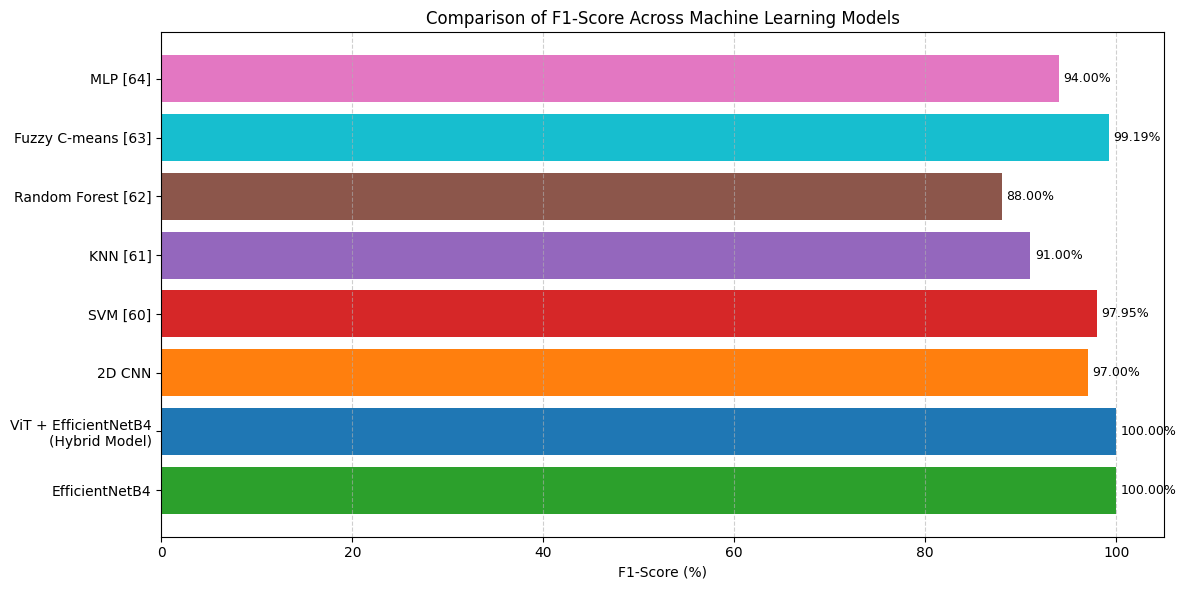

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = [
    'EfficientNetB4',
    'ViT + EfficientNetB4\n(Hybrid Model)',
    '2D CNN',
    'SVM [60]',
    'KNN [61]',
    'Random Forest [62]',
    'Fuzzy C-means [63]',
    'MLP [64]'
]

# F1-Scores (%)
f1_scores = [100, 100, 97, 97.95, 91, 88, 99.19, 94]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(algorithms, f1_scores, color=[
    '#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#17becf', '#e377c2'])

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}%', va='center', fontsize=9)

plt.xlabel('F1-Score (%)')
plt.title('Comparison of F1-Score Across Machine Learning Models')
plt.xlim(0, 105)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Install Required Libraries
!pip install tensorflow keras

# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Data Preprocessing (Kaggle Dataset)
train_dir = '/content/train'  # Update the path accordingly
test_dir = '/content/test'

IMG_SIZE = 380  # EfficientNetB4 input size
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, rotation_range=20, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# EfficientNetB4 Feature Extraction
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze Base Model Layers
for layer in base_model.layers:
    layer.trainable = False

# Classification Layers (Dense, Dropout, Regularization)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 Classes: Glioma, Meningioma, Pituitary, No Tumor

# Complete Model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate Model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Classification Report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
print('Confusion Matrix')
print(cm)

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/train'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_pred and test_generator.classes are already available from previous steps

# Compute Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Class Labels (modify according to your dataset)
class_names = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'test_generator' is not defined